In [1]:
#importing libraries 
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
#loading the data 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

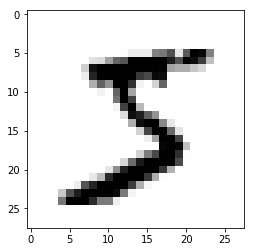

In [6]:
plt.imshow(train_images[0], cmap = 'binary')

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

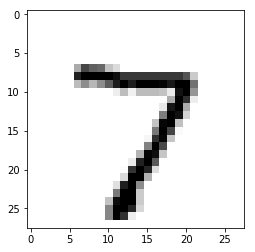

In [10]:
plt.imshow(test_images[0], cmap = 'binary')

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
# normalizing train and test data 
# It helps in quicker convergence 
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
def conv3Layer(operation, optimal_epoch = None):
    
    network = models.Sequential()
    network.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
    network.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
    network.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(10, activation ='softmax'))
    
    network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
    
    if operation == 'train':
        
        print(network.summary())
        history = network.fit(train_images, train_labels,
                              validation_split = 0.2, epochs = 20,
                              batch_size = 64, verbose = 1)
    
        err_plot(history)
        
    else:
        
        history = network.fit(train_images, train_labels,
                              epochs = optimal_epoch,
                              batch_size = 64, verbose = 1)
        result = network.evaluate(test_images, test_labels)
        print('\n TEST Accuracy of the model: ', result[1])

In [34]:
from keras import regularizers

def conv5Layer(operation, optimal_epoch = None):
    
    network = models.Sequential()
    network.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1),
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Conv2D(64, (3, 3), activation = 'relu', 
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.MaxPooling2D(2, 2))
    network.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.MaxPooling2D(2, 2))
    network.add(layers.Conv2D(16, (3, 3), activation = 'relu',
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Flatten())
    network.add(layers.Dense(10, activation ='softmax'))
    
    network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
    
    if operation == 'train':
        
        print(network.summary())
        history = network.fit(train_images, train_labels,
                              validation_split = 0.2, epochs = 20,
                              batch_size = 64, verbose = 1)
    
        err_plot(history)
        
    else:
        
        history = network.fit(train_images, train_labels,
                              epochs = optimal_epoch,
                              batch_size = 64, verbose = 1)
        result = network.evaluate(test_images, test_labels)
        print('\n TEST Accuracy of the model: ', result[1])

In [43]:
def conv7Layer(operation, optimal_epoch = None):
    
    network = models.Sequential()
    network.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (28, 28, 1),
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Conv2D(128, (3, 3), activation = 'relu', 
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Conv2D(128, (3, 3), activation = 'relu',
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.MaxPooling2D(2, 2))
    network.add(layers.Conv2D(256, (2, 2), activation = 'relu',
                              kernel_regularizer = regularizers.l2(0.0001)))
    network.add(layers.Conv2D(256, (2, 2), activation = 'relu'))
    network.add(layers.Conv2D(128, (2, 2), activation = 'relu'))
    network.add(layers.MaxPooling2D(2, 2))
    network.add(layers.Dropout(0.5))
    network.add(layers.Conv2D(64, (2, 2), activation = 'relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(10, activation ='softmax'))
    
    network.compile(optimizer = 'adam',
                        loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])
    
    if operation == 'train':
        
        print(network.summary())
        history = network.fit(train_images, train_labels,
                              validation_split = 0.2, epochs = 20,
                              batch_size = 64, verbose = 1)
    
        err_plot(history)
        
    else:
        
        history = network.fit(train_images, train_labels,
                              epochs = optimal_epoch,
                              batch_size = 64, verbose = 1)
        result = network.evaluate(test_images, test_labels)
        print('\n TEST Accuracy of the model: ', result[1])

In [17]:
def err_plot(history):
    
    sns.set()
    # train-cv plot for accuracy
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), history.history['acc'], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), history.history['val_acc'], color = 'r')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'CV'])
    plt.show()
        
    # train-cv plot for loss
    plt.figure(figsize = (8, 5))
    plt.plot(np.arange(1, 21, step = 1), history.history['loss'], color = 'b')
    plt.plot(np.arange(1, 21, step = 1), history.history['val_loss'], color = 'r')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'CV'])
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                154890    
Total params: 162,010
Trainable params: 162,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 165us/step - loss: 0

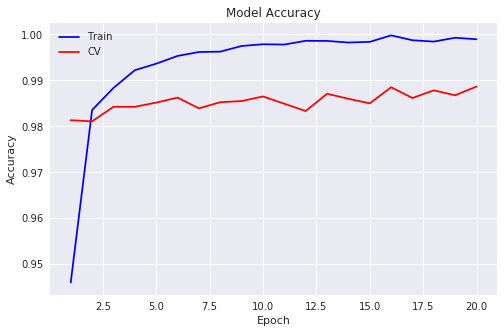

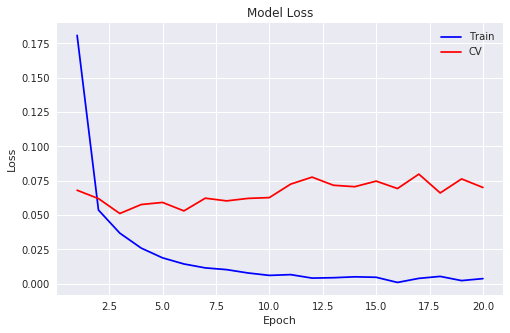

In [16]:
conv3Layer('train')

In [24]:
conv3Layer('test', 3)

Epoch 1/3
60000/60000 [==============================] - 3s 53us/step - loss: 0.1506 - acc: 0.9546
Epoch 2/3
60000/60000 [==============================] - 3s 49us/step - loss: 0.0504 - acc: 0.9848
Epoch 3/3
10000/10000 [==============================] - 0s 31us/step

 TEST Accuracy of the model:  0.9874


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 2, 2, 16)          4624      
__________

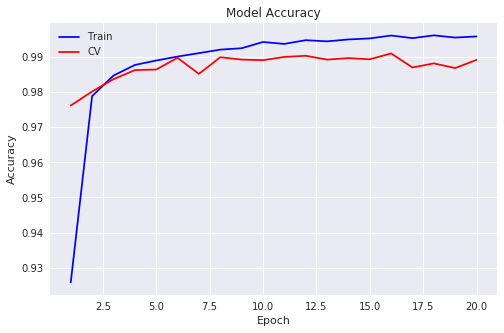

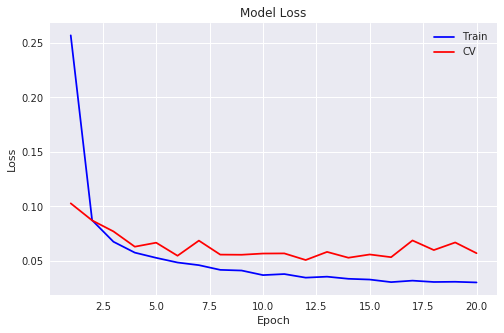

In [35]:
conv5Layer('train')

In [37]:
conv5Layer('test', 6)

Epoch 1/6
60000/60000 [==============================] - 6s 97us/step - loss: 0.2418 - acc: 0.9313
Epoch 2/6
60000/60000 [==============================] - 5s 88us/step - loss: 0.0884 - acc: 0.9780
Epoch 3/6
60000/60000 [==============================] - 5s 88us/step - loss: 0.0686 - acc: 0.9850
Epoch 4/6
60000/60000 [==============================] - 5s 87us/step - loss: 0.0593 - acc: 0.9869
Epoch 5/6
60000/60000 [==============================] - 5s 89us/step - loss: 0.0540 - acc: 0.9893
Epoch 6/6
10000/10000 [==============================] - 1s 54us/step

 TEST Accuracy of the model:  0.9902


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 10, 10, 256)       131328    
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 9, 9, 256)         262400    
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 128)         131200    
__________

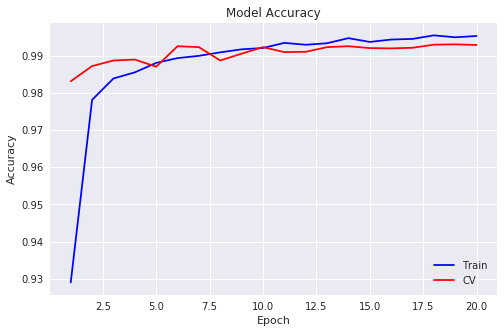

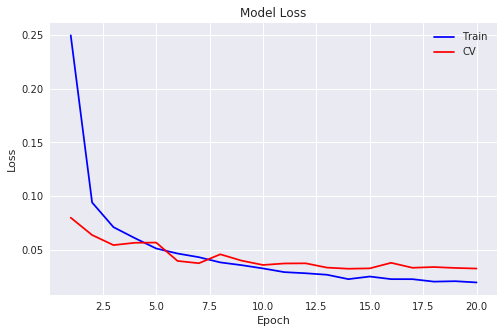

In [44]:
conv7Layer('train')

In [45]:
conv7Layer('test', 10)

Epoch 1/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2124 - acc: 0.9428
Epoch 2/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0858 - acc: 0.9802
Epoch 3/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0660 - acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0570 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0487 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0428 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0384 - acc: 0.9901
Epoch 8/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0349 - acc: 0.9918
Epoch 9/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0335 - acc: 0.9916
Epoch 10/10
10000/10000 [==============================] - 2s 200us/step

 TEST Ac